# Simple Linear Regression

## Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset

In [ ]:
# load and clean-up data
from numpy import nan
from pandas import read_csv
# load all data
dataset = read_csv('/content/drive/MyDrive/Colab Notebooks/hsc.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())
# mark all missing values
dataset.replace('?', nan, inplace=True)
# add a column for for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
# save updated dataset
dataset.to_csv('hsc.csv')
# load the new dataset and summarize
dataset = read_csv('hsc.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
print(dataset.head())
dataset

(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,15.766666
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,15.733334
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,15.633333


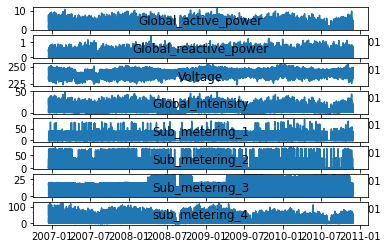

In [ ]:
# line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('/content/hsc.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# line plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	pyplot.plot(dataset[name])
	pyplot.title(name, y=0)
pyplot.show()

In [ ]:
dataset.to_csv('ds_dataset.csv', index=False)

In [ ]:
droping_list_all=[]
for j in range(0,8):
    if not dataset.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
for j in range(0,8):        
        dataset.iloc[:,j]=dataset.iloc[:,j].fillna(dataset.iloc[:,j].mean())

In [ ]:
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
sub_metering_4           0
dtype: int64

In [ ]:
X = dataset

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    X, test_size=0.8, random_state=0)

In [ ]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [ ]:
train.shape

(415051, 8)

In [ ]:
test.shape

(1660208, 8)

In [ ]:
#Interpolation of data 
import numpy as np
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [ ]:

y = np.log(train.Global_active_power)
X = data.drop(['Global_active_power'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score


# y_train = np.log10(y_train)
# y_test = np.log10(y_test)
# X = X_train.iloc[:, :7].values
# Y = y_train.iloc[:, 2].values
# Fit Regression Model
reg = RandomForestRegressor(n_estimators=100, max_depth=50, random_state = 0)
reg.fit(X_train,y_train)

# Calculate Training and Test Accuracy
training_accuracy = reg.score(X_train, y_train)
test_accuracy = reg.score(X_test, y_test)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print("R-squared: ", r2_score(y_train.values, y_train_pred))
# Calculate Root mean squared error
rmse_train = np.sqrt(mean_squared_error(reg.predict(X_train),y_train))
rmse_test = np.sqrt(mean_squared_error(reg.predict(X_test),y_test))
print("Training Accuracy = %0.3f, Test Accuracy = %0.3f, RMSE (train) = %0.3f, RMSE (test) = %0.3f" % (training_accuracy, test_accuracy, rmse_train, rmse_test))

R-squared:  0.999973508697203
Training Accuracy = 1.000, Test Accuracy = 1.000, RMSE (train) = 0.005, RMSE (test) = 0.013


In [ ]:
from sklearn import linear_model
from sklearn import ensemble
lr = linear_model.LinearRegression()
feats = test.select_dtypes(
        include=[np.number]).interpolate()
feats

In [ ]:
model = lr.fit(X_train, y_train)

In [ ]:
print ("R^2 is: \n",model.score(X_test, y_test))
rsq1 = model.score(X_test, y_test)

R^2 is: 0.6858709812343906 



In [ ]:
predictions = model.predict(X_test)

In [ ]:
final_predictions = np.exp(predictions)

In [ ]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n' ,mean_squared_error(y_test, predictions))

RMSE is: 0.1984929653996405



Text(0.5, 1.0, 'Linear Regression Model')

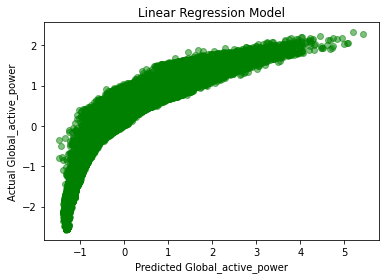

In [ ]:
actual_values = y_test
pyplot.scatter(predictions, actual_values, alpha=0.5,
            color='g') #alpha helps to show overlapping data
pyplot.xlabel('Predicted Global_active_power')
pyplot.ylabel('Actual Global_active_power')
pyplot.title('Linear Regression Model')
#pltrandom_state=None.show()

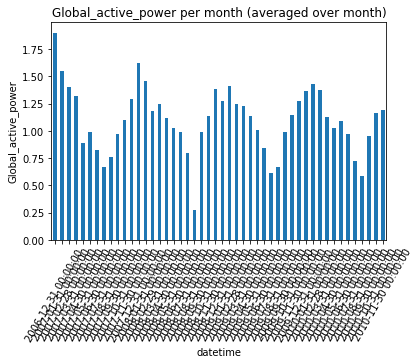

In [ ]:
# Sum of 'Global_active_power' resampled over month
dataset['Global_active_power'].resample('M').mean().plot(kind='bar')
pyplot.xticks(rotation=60)
pyplot.ylabel('Global_active_power')
pyplot.title('Global_active_power per month (averaged over month)')
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  if __name__ == '__main__':


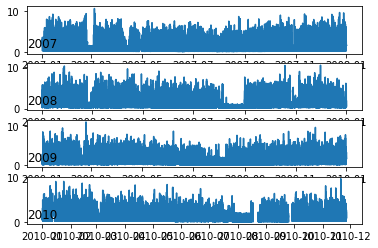

In [ ]:
years = ['2007', '2008', '2009', '2010']
pyplot.figure()
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[str(year)]
	# plot the active power for the year
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='left')
pyplot.show()

## Training the Simple Linear Regression model on the Training set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  if __name__ == '__main__':


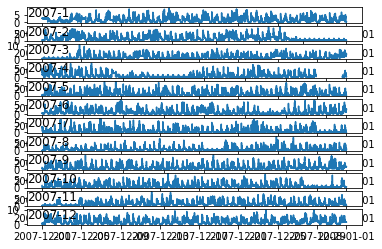

In [ ]:
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(month, y=0, loc='left')
pyplot.show()

## Predicting the Test set results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  if __name__ == '__main__':


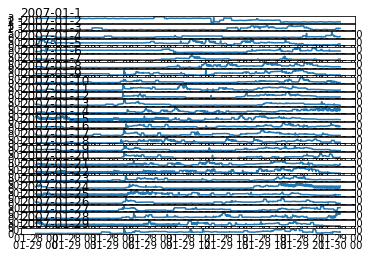

In [ ]:
days = [x for x in range(1, 30)]
pyplot.figure()
for i in range(len(days)):
	# prepare subplot
	ax = pyplot.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = '2007-01-' + str(days[i])
	# get all observations for the day
	result = dataset[day]
	# plot the active power for the day
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(day, y=0, loc='left')
pyplot.show()

## Visualising the Training set results

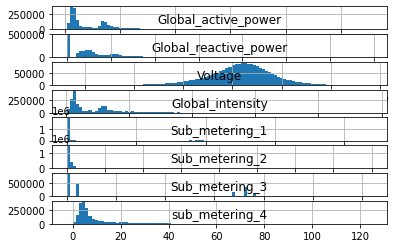

In [ ]:
# histogram plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	dataset[name].hist(bins=100)
	pyplot.title(name, y=0)
pyplot.show()

## Visualising the Test set results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  if __name__ == '__main__':


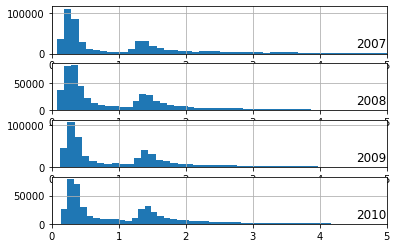

In [ ]:
years = ['2007', '2008', '2009', '2010']
pyplot.figure()
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[str(year)]
	# plot the active power for the year
	result['Global_active_power'].hist(bins=100)
	# zoom in on the distribution
	ax.set_xlim(0, 5)
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='right')
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  if __name__ == '__main__':


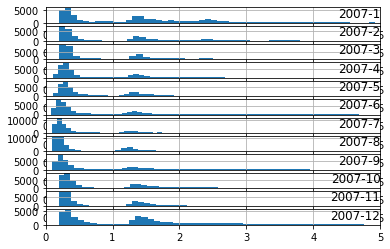

In [ ]:
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	result['Global_active_power'].hist(bins=100)
	# zoom in on the distribution
	ax.set_xlim(0, 5)
	# add a title to the subplot
	pyplot.title(month, y=0, loc='right')
pyplot.show()

In [ ]:
a=dataset["Global_active_power"]
b = a[1600238:2075259]
b.mean()

1.0609969828942771

In [ ]:
print(b)
#import scipy
#import scipy.stats as stats
#scipy.stats.zscore(b, axis=0, nan_policy='omit')

datetime
2010-01-01 00:02:00    10.666666
2010-01-01 00:03:00    11.100000
2010-01-01 00:04:00    10.100000
2010-01-01 00:05:00     9.100000
2010-01-01 00:06:00    10.000000
                         ...    
2010-11-26 20:58:00    15.766666
2010-11-26 20:59:00    15.733334
2010-11-26 21:00:00    15.633333
2010-11-26 21:01:00    15.566667
2010-11-26 21:02:00    15.533334
Name: sub_metering_4, Length: 475021, dtype: float64


In [ ]:
import math
z = (1.0609969828942771-1.091615)/(1.057294/(math.sqrt(475021)))
print(z)

-19.958950381118417


In [ ]:
print(9.58916/math.sqrt(475021))

0.013913108127492529
